In [26]:
 import numpy as np
import pandas as pd

# Constants for baseline data
current_density_base = 250  # mA/cm^2
voltage_base = 3.0  # V
temperature_base = 40  # °C
energy_input_base = 33  # kWh/kg
catalyst_cost_base = 50  # gm/kg
efficiency_base = 0.55  # Faradaic Efficiency

# Generate synthetic data
num_samples = 1000
data = {
    'Current Density (mA/cm^2)': np.random.normal(current_density_base, 20, num_samples),
    'Cell Voltage (V)': np.random.normal(voltage_base, 0.2, num_samples),
    'Temperature (°C)': np.random.normal(temperature_base, 5, num_samples),
    'Energy Input (kWh/kg)': np.random.normal(energy_input_base, 2, num_samples),
    'Catalyst Cost (gm/kg)': np.random.normal(catalyst_cost_base, 5, num_samples),
    'Faradaic Efficiency (%)': np.random.normal(efficiency_base, 0.05, num_samples) * 100,
}

df = pd.DataFrame(data)
df = df.clip(lower=0)  # Ensure no negative values

# Insert null values with random proportions for each column
for column in df.columns:
    null_probability = np.random.uniform(0.01, 0.1)  # Random null probability between 1% and 10%
    df.loc[df.sample(frac=null_probability).index, column] = np.nan

# Add 'Province' column with random provinces
provinces = [
    'British Columbia', 'Alberta', 'Saskatchewan', 'Manitoba', 'Ontario', 
    'Quebec', 'New Brunswick', 'Nova Scotia', 'Prince Edward Island', 
    'Newfoundland and Labrador', 'Yukon', 'Northwest Territories', 'Nunavut'
]
df['Province'] = np.random.choice(provinces, num_samples)

# Emission factors for each province (kg CO2e/kWh)
emission_factors = {
    'British Columbia': 0.015,  # kg CO2e/kWh
    'Alberta': 0.54,  # kg CO2e/kWh
    'Saskatchewan': 0.73,  # kg CO2e/kWh
    'Manitoba': 0.002,  # kg CO2e/kWh
    'Ontario': 0.03,  # kg CO2e/kWh
    'Quebec': 0.0017,  # kg CO2e/kWh
    'New Brunswick': 0.3,  # kg CO2e/kWh
    'Nova Scotia': 0.69,  # kg CO2e/kWh
    'Prince Edward Island': 0.3,  # kg CO2e/kWh
    'Newfoundland and Labrador': 0.017,  # kg CO2e/kWh
    'Yukon': 0.08,  # kg CO2e/kWh
    'Northwest Territories': 0.17,  # kg CO2e/kWh
    'Nunavut': 0.84,  # kg CO2e/kWh
}

# Electricity costs per kWh for each province (2020 values)
electricity_costs = {
    'British Columbia': 0.124,  # $/kWh (2020)
    'Alberta': 0.167,  # $/kWh (2020)
    'Saskatchewan': 0.182,  # $/kWh (2020)
    'Manitoba': 0.096,  # $/kWh (2020)
    'Ontario': 0.125,  # $/kWh (2020)
    'Quebec': 0.073,  # $/kWh (2020)
    'New Brunswick': 0.127,  # $/kWh (2020)
    'Nova Scotia': 0.150,  # $/kWh (2020)
    'Prince Edward Island': 0.168,  # $/kWh (2020)
    'Newfoundland and Labrador': 0.138,  # $/kWh (2020)
    'Yukon': 0.145,  # $/kWh (2020)
    'Northwest Territories': 0.387,  # $/kWh (2020)
    'Nunavut': 0.375,  # $/kWh (2020)
}

# Calculate CO2 emissions based on energy input and emission factor
df['CO2 Emissions (kg CO2/kg Ethanol)'] = df['Energy Input (kWh/kg)'] * df['Province'].map(emission_factors)

# Calculate energy cost per kg of ethanol (Energy Input * Electricity Cost)
df['Energy Cost ($/kg Ethanol)'] = df['Energy Input (kWh/kg)'] * df['Province'].map(electricity_costs)

# Save or export the dataset
df.to_csv('synthetic_CO2_ethanol_data_with_emissions_and_energy_cost.csv', index=False)


In [23]:
df.dtypes 

Current Density (mA/cm^2)            float64
Cell Voltage (V)                     float64
Temperature (°C)                     float64
Energy Input (kWh/kg)                float64
Catalyst Cost (gm/kg)                float64
Faradaic Efficiency (%)              float64
Province                              object
CO2 Emissions (kg CO2/kg Ethanol)    float64
dtype: object

In [24]:
print(df.isnull().sum())

Current Density (mA/cm^2)             13
Cell Voltage (V)                      89
Temperature (°C)                      66
Energy Input (kWh/kg)                 38
Catalyst Cost (gm/kg)                100
Faradaic Efficiency (%)               87
Province                               0
CO2 Emissions (kg CO2/kg Ethanol)     38
dtype: int64


In [27]:
df.head(100)

,Current Density (mA/cm^2),Cell Voltage (V),Temperature (°C),Energy Input (kWh/kg),Catalyst Cost (gm/kg),Faradaic Efficiency (%),Province,CO2 Emissions (kg CO2/kg Ethanol),Energy Cost ($/kg Ethanol)
0,253.804867,2.893334,30.531770,31.005234,45.742627,61.706862,British Columbia,0.465079,3.844649
1,247.446081,2.614819,42.257528,33.532333,47.322561,57.001298,Alberta,18.107460,5.599900
2,241.915363,2.730450,28.813661,31.087918,44.967174,53.570079,Nova Scotia,21.450663,4.663188
3,268.907661,3.256485,43.930500,34.070879,48.936302,57.193511,Ontario,1.022126,4.258860
4,242.925302,2.814919,40.989945,30.318965,NaN,47.649114,Prince Edward Island,9.095690,5.093586
...,...,...,...,...,...,...,...,...,...
95,247.448978,3.163466,36.504446,33.423182,45.365829,56.604893,British Columbia,0.501348,4.144475
96,265.590389,3.199597,39.578442,30.479536,50.895682,61.281350,Ontario,0.914386,3.809942
97,239.521505,2.793253,48.059601,33.900623,48.443327,63.468438,Newfoundland and Labrador,0.576311,4.678286
98,193.640026,2.853236,41.279294,32.393594,44.825764,51.582937,Northwest Territories,5.506911,12.536321


In [35]:
df.shape

(1000, 9)

In [29]:
import pandas as pd

# Load the dataset
df = pd.read_csv('synthetic_CO2_ethanol_data_with_emissions_and_energy_cost.csv')

# Handle missing values for numeric columns by filling with the mean
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Handle missing values for categorical columns (e.g., 'Province') by filling with the mode
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# One-hot encode the 'Province' column
df = pd.get_dummies(df, columns=['Province'], drop_first=True)

# Check the cleaned data
print(df.head())


   Current Density (mA/cm^2)  Cell Voltage (V)  Temperature (°C)  \
0                 253.804867          2.893334         30.531770   
1                 247.446081          2.614819         42.257528   
2                 241.915363          2.730450         28.813661   
3                 268.907661          3.256485         43.930500   
4                 242.925302          2.814919         40.989945   

   Energy Input (kWh/kg)  Catalyst Cost (gm/kg)  Faradaic Efficiency (%)  \
0              31.005234              45.742627                61.706862   
1              33.532333              47.322561                57.001298   
2              31.087918              44.967174                53.570079   
3              34.070879              48.936302                57.193511   
4              30.318965              49.671579                47.649114   

   CO2 Emissions (kg CO2/kg Ethanol)  Energy Cost ($/kg Ethanol)  \
0                           0.465079                    3.844649  

In [31]:
# Handle missing values for numeric columns
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

# Handle missing values for categorical columns (e.g., 'Province')
df['Province'].fillna(df['Province'].mode()[0], inplace=True)

# One-hot encode the 'Province' column
df = pd.get_dummies(df, columns=['Province'], drop_first=True)


/var/folders/hw/dm437q5x7njf6sp33c671ddc0000gn/T/ipykernel_88129/1002707318.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Province'].fillna(df['Province'].mode()[0], inplace=True)


Matplotlib is building the font cache; this may take a moment.


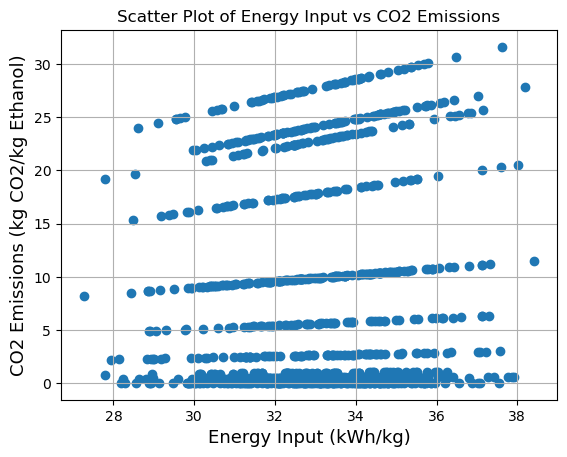

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('synthetic_CO2_ethanol_data_with_emissions_and_energy_cost.csv')

# Plot Energy Input vs CO2 Emissions
fig, ax = plt.subplots()
ax.scatter(x=df['Energy Input (kWh/kg)'], y=df['CO2 Emissions (kg CO2/kg Ethanol)'])
plt.xlabel('Energy Input (kWh/kg)', fontsize=13)
plt.ylabel('CO2 Emissions (kg CO2/kg Ethanol)', fontsize=13)
plt.title('Scatter Plot of Energy Input vs CO2 Emissions')
plt.grid(True)
plt.show()



In [39]:
# Fill missing values only for numeric columns
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)


Mean Squared Error: 0.04832545187120708
R-squared: 0.9953582713455505


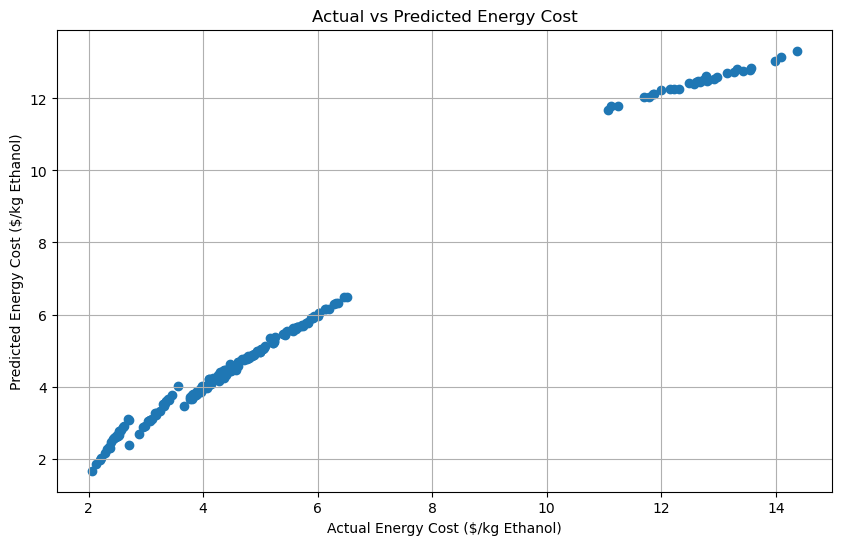

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('synthetic_CO2_ethanol_data_with_emissions_and_energy_cost.csv')


df = pd.get_dummies(df, columns=['Province'], drop_first=True)
# Handle missing values by filling with column mean
df.fillna(df.mean(), inplace=True)

# Select features and target variable
# Here, I assume 'Energy Cost ($/kg Ethanol)' as the target for prediction
X = df[['Current Density (mA/cm^2)', 'Cell Voltage (V)', 'Temperature (°C)',
        'Energy Input (kWh/kg)', 'Catalyst Cost (gm/kg)', 'Faradaic Efficiency (%)'] + 
       [col for col in df.columns if col.startswith('Province_')]]
y = df['Energy Cost ($/kg Ethanol)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Energy Cost ($/kg Ethanol)')
plt.ylabel('Predicted Energy Cost ($/kg Ethanol)')
plt.title('Actual vs Predicted Energy Cost')
plt.grid(True)
plt.show()


In [43]:
# Create a DataFrame with new data for 2025
# Replace these with realistic values for 2025 as needed
input_data_2025 = {
    'Current Density (mA/cm^2)': [150, 200],  # Example values
    'Cell Voltage (V)': [3.5, 3.7],
    'Temperature (°C)': [25, 30],
    'Energy Input (kWh/kg)': [5.0, 5.5],
    'Catalyst Cost (gm/kg)': [20, 22],
    'Faradaic Efficiency (%)': [85, 88],
    # Add dummy columns for provinces with zero values (or relevant values)
    **{col: [0, 0] for col in X.columns if col.startswith('Province_')}
}

# Convert the dictionary to a DataFrame
df_2025 = pd.DataFrame(input_data_2025)

# Predict the energy cost for 2025 using the trained model
y_pred_2025 = model.predict(df_2025)

# Display the predicted values
print("Predicted Energy Cost for 2025:")
for i, prediction in enumerate(y_pred_2025):
    print(f"Scenario {i+1}: ${prediction:.2f} per kg of ethanol")


Predicted Energy Cost for 2025:
Scenario 1: $0.84 per kg of ethanol
Scenario 2: $0.89 per kg of ethanol
